# Data Manipulation and Visualization

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

### Information  


In [ ]:
full_name = 'Ali Aramideh'

In [ ]:
# Import all your libraries here
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

from sklearn.preprocessing import LabelEncoder

## Covid in the US
In this question, you are required to reproduce the graphs shown in a real journalistic article. After all, reproducibility is an important part of professional journalism as well as data science. Also, a great deal of a data scientist's work is to communicate data in a way that anyone with any level of expertise in the field would understand.

You should reproduce the 4 graphs shown in <a href="https://projects.fivethirtyeight.com/coronavirus-polls/"> this article</a>. The data is openly accessible through <a href="https://github.com/fivethirtyeight/covid-19-polls/"> FiveThirtyEight's github</a>. Nevertheless, both the data and the article are available in `data` folder in case of unstable internet connections!

*Note: Your graphs don't have to be as interactive or detailed as the ones on the website. Only showing the averages, some (not all) data points with light color, legends, titles, x values, and y values are necessary.*

In [ ]:
df_covid_approval_polls = pd.read_csv('data/covid/covid-19-polls-master/covid_approval_polls.csv')
df_covid_approval_toplines = pd.read_csv('data/covid/covid-19-polls-master/covid_approval_toplines.csv')
df_covid_concern_polls = pd.read_csv('data/covid/covid-19-polls-master/covid_concern_polls.csv')
df_covid_concern_toplines = pd.read_csv('data/covid/covid-19-polls-master/covid_concern_toplines.csv')

In [ ]:
# Convert to datetime
df_covid_approval_polls['start_date'] = pd.to_datetime(df_covid_approval_polls['start_date'])
df_covid_approval_toplines['modeldate'] = pd.to_datetime(df_covid_approval_toplines['modeldate'])
df_covid_concern_polls['start_date'] = pd.to_datetime(df_covid_concern_polls['start_date'])
df_covid_concern_toplines['modeldate'] = pd.to_datetime(df_covid_concern_toplines['modeldate'])

#### Part1.1 Do Americans approve of Biden’s response to the coronavirus crisis?
A calculation of the share of all Americans who approve of the president’s handling of the coronavirus outbreak

/var/folders/c2/3qrgx7c502x0vvp2clb6ztm40000gn/T/ipykernel_16005/1345400163.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_covid_approval_polls_Biden_1 = df_covid_approval_polls_Biden_1[df_covid_approval_polls_Biden['party'] != 'D']


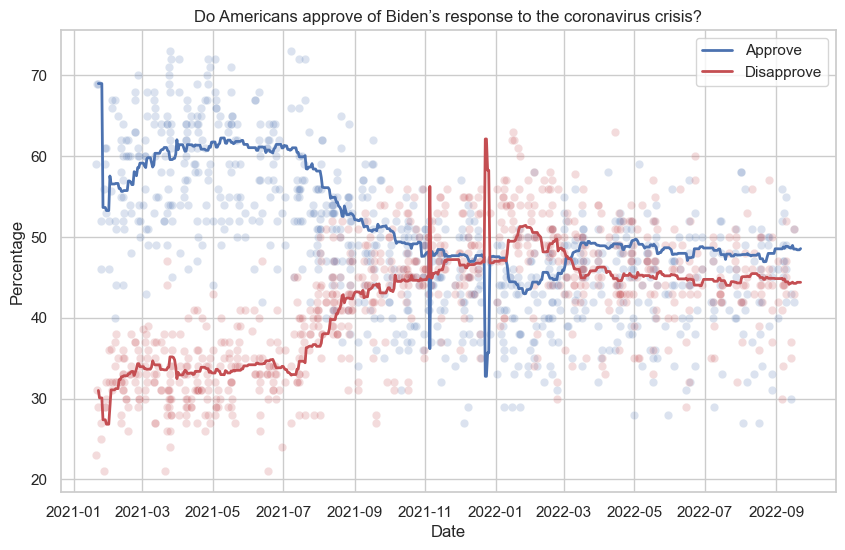

In [ ]:
# Select Biden:
df_covid_approval_toplines_Biden = df_covid_approval_toplines[df_covid_approval_toplines['subject'] != 'Trump']
df_covid_approval_polls_Biden = df_covid_approval_polls[df_covid_approval_polls['subject'] != 'Trump']
df_covid_approval_polls_Biden_1 = df_covid_approval_polls_Biden[df_covid_approval_polls_Biden['party'] != 'R']
df_covid_approval_polls_Biden_1 = df_covid_approval_polls_Biden_1[df_covid_approval_polls_Biden['party'] != 'D']
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_covid_approval_toplines_Biden, x='modeldate',
             y='approve_estimate', errorbar=None, lw=2, label='Approve',color='b')
sns.lineplot(data=df_covid_approval_toplines_Biden,
             x='modeldate', y='disapprove_estimate', errorbar=None, lw=2, label='Disapprove', color='r')
sns.scatterplot(data=df_covid_approval_polls_Biden_1, x='start_date',y='approve', alpha=0.2, color='b')
sns.scatterplot(data=df_covid_approval_polls_Biden_1, x='start_date', y='disapprove', alpha=0.2, color='r')
plt.title('Do Americans approve of Biden’s response to the coronavirus crisis?')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

#### Part1-2. Do Americans approve of Trump’s response to the coronavirus crisis?
A calculation of the share of all Americans who approve of the president’s handling of the coronavirus outbreak

In [ ]:
# Select Trump:
df_covid_approval_toplines_Trump = df_covid_approval_toplines[df_covid_approval_toplines['subject'] != 'Biden']
# Filter data to remove rows after 2021-05
df_covid_approval_toplines_Trump = df_covid_approval_toplines_Trump[df_covid_approval_toplines_Trump['modeldate']
                                                                    <= pd.to_datetime('2021-05-01')]

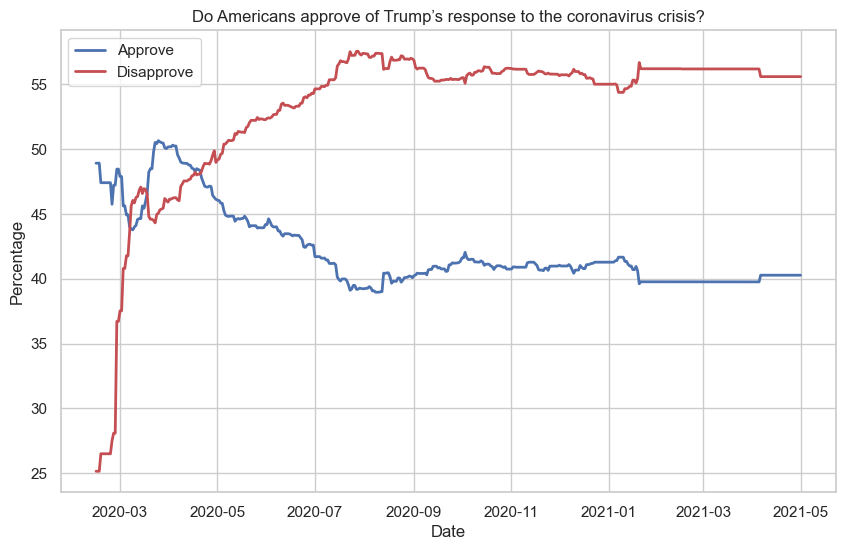

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_covid_approval_toplines_Trump, x='modeldate',
             y='approve_estimate', errorbar=None, lw=2, label='Approve',color='b')
sns.lineplot(data=df_covid_approval_toplines_Trump,x='modeldate',
             y='disapprove_estimate', errorbar=None, lw=2, label='Disapprove', color='r')
plt.title('Do Americans approve of Trump’s response to the coronavirus crisis?')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()
plt.show()

#### Part2-1. Approval of Biden’s response varies widely by party
A calculation of the share of Democrats, Republicans and independents who approve of the president’s handling of the coronavirus outbreak


In [ ]:
# Combine respect to party: all and l should combine to Indipendent
df_covid_approval_toplines_Biden['party'] = df_covid_approval_toplines_Biden['party'].str.replace('I', 'Independents')
df_covid_approval_toplines_Biden['party'] = df_covid_approval_toplines_Biden['party'].str.replace('all', 'Independents')
df_covid_approval_polls_Biden['party'] = df_covid_approval_polls_Biden['party'].str.replace('I', 'Independents')
df_covid_approval_polls_Biden['party'] = df_covid_approval_polls_Biden['party'].str.replace('all', 'Independents')

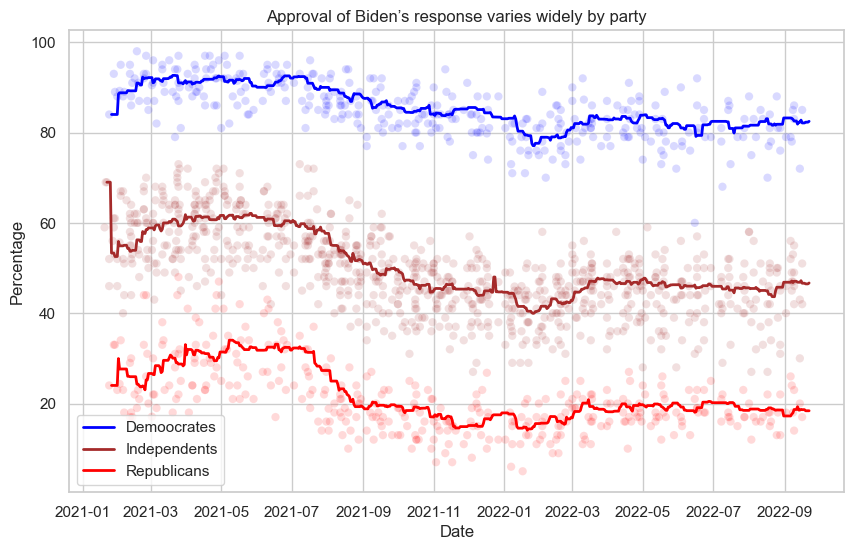

In [ ]:
# Define custom colors for each category
custom_palette = {'R': 'red',
                  'Independents': 'brown',
                  'D': 'blue'}

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_covid_approval_toplines_Biden, palette=custom_palette,
             x='modeldate', y='approve_estimate', hue='party', errorbar=None, lw=2, legend=False)
sns.scatterplot(data=df_covid_approval_polls_Biden, x='start_date', y='approve', hue='party',
                 legend=False, palette=custom_palette, alpha=0.15)

plt.legend(['Demoocrates', 'Independents', 'Republicans'])
plt.title('Approval of Biden’s response varies widely by party')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()

#### Part2-2. Approval of Trump’s response varies widely by party
A calculation of the share of Democrats, Republicans and independents who approve of the president’s handling of the coronavirus outbreak


In [ ]:
# Combine respect to party: all and l should combine to Indipendent
df_covid_approval_toplines_Trump['party'] = df_covid_approval_toplines_Trump['party'].str.replace('I', 'Independents')
df_covid_approval_toplines_Trump['party'] = df_covid_approval_toplines_Trump['party'].str.replace('all', 'Independents')

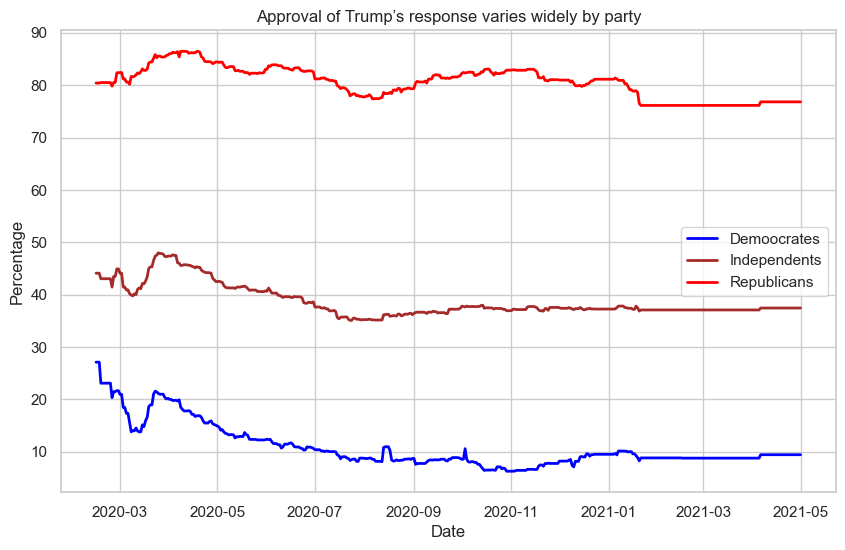

In [ ]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_covid_approval_toplines_Trump, palette=custom_palette,
             x='modeldate', y='approve_estimate', hue='party', errorbar=None, lw=2, legend=False)

plt.legend(['Demoocrates', 'Independents', 'Republicans'])
plt.title('Approval of Trump’s response varies widely by party')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()

#### Part3-1. How worried are Americans about infection?
How concerned Americans say they are that they, someone in their family or someone else they know will become infected with the coronavirus

In [ ]:
df_covid_concern_toplines.head()

,subject,modeldate,party,very_estimate,somewhat_estimate,not_very_estimate,not_at_all_estimate,timestamp
0,concern-economy,2022-03-02,all,48.953147,35.466522,10.451832,3.739761,15:12:25 2 Mar 2022
1,concern-infected,2022-03-02,all,24.186896,32.532791,26.515491,16.539938,15:12:28 2 Mar 2022
2,concern-economy,2022-03-01,all,48.953147,35.466522,10.451832,3.739761,04:08:53 2 Mar 2022
3,concern-infected,2022-03-01,all,24.186896,32.532791,26.515491,16.539938,04:09:00 2 Mar 2022
4,concern-economy,2022-02-28,all,49.041857,35.450926,10.346955,3.744365,10:58:25 28 Feb 2022


In [ ]:
# Select infection concern
df_covid_concern_toplines_infection = df_covid_concern_toplines[df_covid_concern_toplines['subject'] != 'concern-economy']
# Filter data to remove rows after 2021-05
df_covid_concern_toplines_infection = df_covid_concern_toplines_infection[df_covid_concern_toplines_infection['modeldate']
                                                                          <= pd.to_datetime('2021-05-31')]

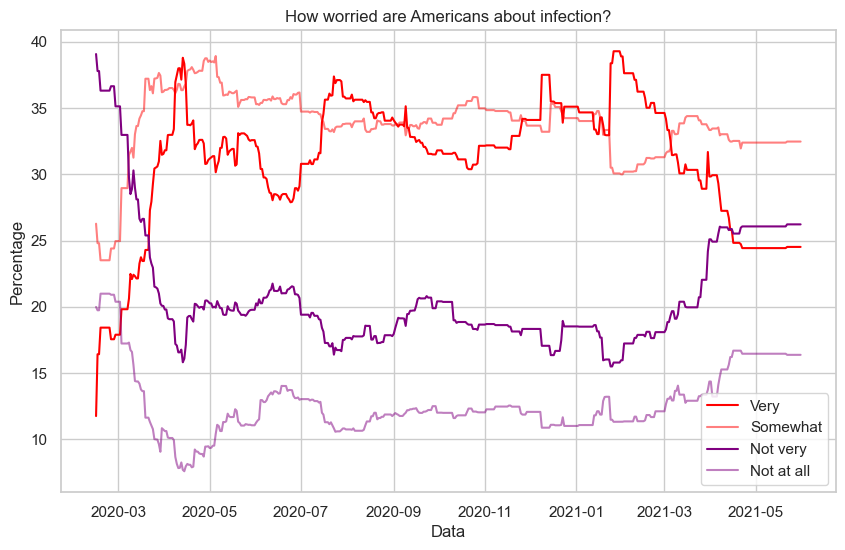

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_covid_concern_toplines_infection, x='modeldate', y='very_estimate', errorbar=None, color='red',
             alpha=1, label='Very')
sns.lineplot(data=df_covid_concern_toplines_infection, x='modeldate', y='somewhat_estimate', errorbar=None, color='red',
             alpha=0.5, label='Somewhat')
sns.lineplot(data=df_covid_concern_toplines_infection, x='modeldate', y='not_very_estimate', errorbar=None, color='purple',
             alpha=1, label='Not very')
sns.lineplot(data=df_covid_concern_toplines_infection, x='modeldate', y='not_at_all_estimate', errorbar=None, color='purple',
             alpha=0.5, label='Not at all')
plt.legend()
plt.title('How worried are Americans about infection?')
plt.xlabel('Data')
plt.ylabel('Percentage')
plt.show()

#### Part3-2. How worried are Americans about the economy?
How concerned Americans say they are about the coronavirus’s effect on the U.S. economy


In [ ]:
# Select economy concern
df_covid_concern_toplines_economy = df_covid_concern_toplines[df_covid_concern_toplines['subject'] == 'concern-economy']
# Filter data to remove rows after 2021-05
df_covid_concern_toplines_economy= df_covid_concern_toplines_economy[df_covid_concern_toplines_economy['modeldate']
                                                                          <= pd.to_datetime('2021-05-31')]

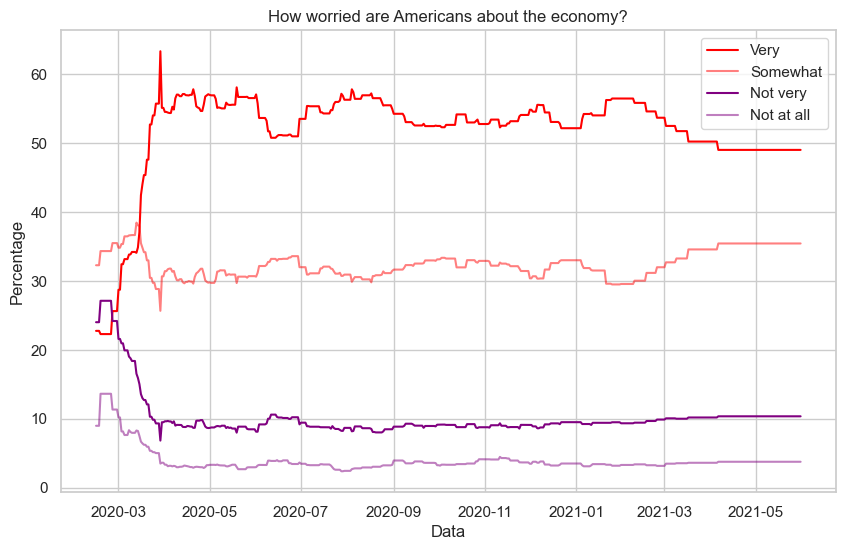

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_covid_concern_toplines_economy, x='modeldate', y='very_estimate', errorbar=None, color='red',
             alpha=1, label='Very')
sns.lineplot(data=df_covid_concern_toplines_economy, x='modeldate', y='somewhat_estimate', errorbar=None, color='red',
             alpha=0.5, label='Somewhat')
sns.lineplot(data=df_covid_concern_toplines_economy, x='modeldate', y='not_very_estimate', errorbar=None, color='purple',
             alpha=1, label='Not very')
sns.lineplot(data=df_covid_concern_toplines_economy, x='modeldate', y='not_at_all_estimate', errorbar=None, color='purple',
             alpha=0.5, label='Not at all')
plt.legend()
plt.title('How worried are Americans about the economy?')
plt.xlabel('Data')
plt.ylabel('Percentage')
plt.show()

**Explain your approach and assumptions once this section is completed.**

I did everything that this question required. I plotted the exact same references and figures that the TA sent to the Telegram group.

For more information please read my comments in each part